<a href="https://colab.research.google.com/github/MauricioMatheus/Data-Structures-2_U2T2/blob/main/AED2_U2T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.1/610.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take int

In [2]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.6 MB/s eta 0:00:00


In [3]:
pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 which is incompatible.
tensorflow 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatib

# **Bibliotecas**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import codecarbon as cc
import numpy as np
import geopy.distance
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
ox.settings.use_cache = True
ox.settings.log_console = True

# Criando o grafo de Natal e estabelecendo a origem

In [5]:
place = {'city': 'Natal', 'state': 'Rio Grande do Norte', 'country': 'Brazil'}
G = ox.graph_from_place(place, network_type='all')
print(f"Grafo de Natal carregado: {len(G.nodes())} nós, {len(G.edges())} arestas.")

# Define a origem
orig_coords = (-5.807712684350378, -35.20352260316861)
orig_node = ox.distance.nearest_nodes(G, X=orig_coords[1], Y=orig_coords[0])

df = pd.read_csv("centroid_filtered.csv")
display(df)

Grafo de Natal carregado: 27760 nós, 70450 arestas.


Lon        Lat        Neighborhood District
0  -5.790850 -35.209797             Alecrim     East
1  -5.796285 -35.196730               Tirol     East
2  -5.788262 -35.190320         Areia Preta     East
3  -5.780528 -35.204124             Ribeira     East
4  -5.767820 -35.200720         Santos Reis     East
..       ...        ...                 ...      ...
60 -5.827432 -35.277770            Guarapes     West
61 -5.820680 -35.265945      Felipe Camarão     West
62 -5.738779 -35.270610  N. S. Apresentação    North
63 -5.726151 -35.250305          Lagoa Azul    North
64 -5.728327 -35.240250            Pajuçara    North

[65 rows x 4 columns]

# Guardando os pontos de destino do csv

In [6]:
dest_nodes_snapped = [ox.distance.nearest_nodes(G, X=row["Lat"], Y=row["Lon"]) for index, row in df.iterrows()]

print(f"Dados carregados: 1 origem e {len(dest_nodes_snapped)} destinos (coletas).")


Dados carregados: 1 origem e 65 destinos (coletas).


# Plotando o mapa com os pontos de coleta

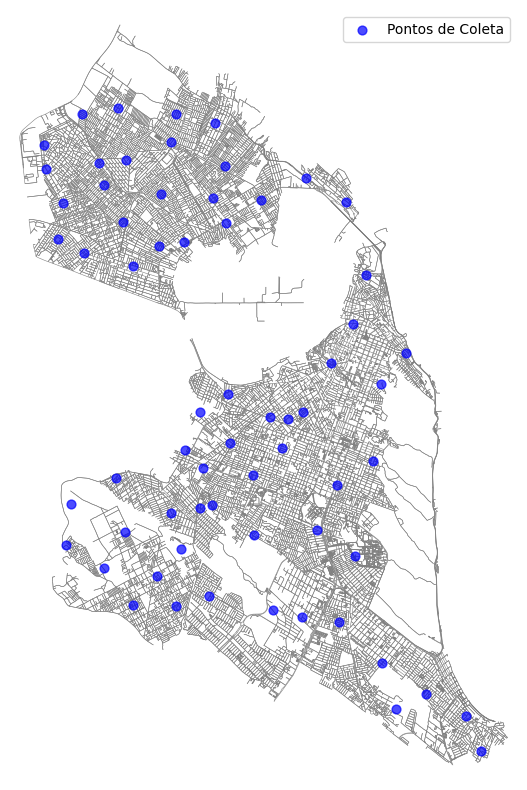

Mapa dos pontos de coleta


In [7]:
#Plotando o grafo base de Natal
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#FFFFFF",
    edge_color="gray",
    edge_linewidth=0.4,
    node_size=0
)

#Extraindo as coordenadas do DataFrame

longitudes = df["Lat"].tolist()
latitudes = df["Lon"].tolist()

#Plotando os 65 pontos de destino sobre o mapa
ax.scatter(
    longitudes,
    latitudes,
    c='blue',
    s=40,
    alpha=0.7,
    label='Pontos de Coleta'
)

#Configurando e mostra o mapa final
ax.legend()
plt.tight_layout()
plt.show()

print("Mapa dos pontos de coleta")


# Estruturação dos dados em vertex, para o uso dos algorítmos Dijkstra

In [8]:
def get_adjacency_list(G, weight='length'):
    # Mapeamento de Nós para index de base 0
    node_to_index = {node: idx for idx, node in enumerate(G.nodes())}
    index_to_node = {idx: node for node, idx in node_to_index.items()}

    adj_list = [[] for _ in range(len(G.nodes()))]

    for u, v, data in G.edges(data=True):
        u_idx = node_to_index[u]  # Index do Nó de origem
        v_idx = node_to_index[v]  # Index Nó de destino

        # Adiciona a estrutura [index Nó de destino, Distancia] no index do Nó de origem

        #adj_list[u_idx].append([v_idx, data.get('length')])

        distancia = data.get(weight, float('inf'))

        adj_list[u_idx].append([v_idx, distancia])

    return adj_list, node_to_index, index_to_node  # Retorna a estrutura de adjacencia e os mapeamentos


adjacency_list, node_to_index,  index_to_node = get_adjacency_list(G)

# **Algorítmo Dijkstra Padrão**

In [9]:
def dijkstrasAlgorithmWithPaths(start, edges):
    """
    Implements Dijkstra's algorithm to find the shortest paths from a starting node to all other nodes in a graph.
    Additionally, it tracks the path to each node using a predecessor list.

    Args:
        start (int): The starting node index.
        edges (list of list): Adjacency list representing the graph. Each index corresponds to a vertex,
                              and each entry is a list of pairs [destination, weight].

    Returns:
        tuple: A tuple containing:
            - minDistances (list): A list of the shortest distances from the starting node to each node.
                                   If a node is unreachable, its distance is `inf`.
            - previousNodes (list): A list where each index points to the predecessor of the node
                                    in the shortest path. `None` if no path exists.
    """
    numberOfVertices = len(edges)

    # Initialize the minimum distances with infinity, except for the starting node (distance 0).
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Set of visited nodes to avoid re-processing.
    visited = set()

    # Predecessor list to track the path to each node.
    previousNodes = [None] * numberOfVertices

    # Iterate until all nodes are processed or no more reachable nodes exist.
    while len(visited) != numberOfVertices:
        # Find the unvisited node with the smallest known distance.
        vertex, currentMinDistance = getVertexWithMinDistance(minDistances, visited)

        # If the smallest distance is infinity, remaining nodes are unreachable.
        if currentMinDistance == float("inf"):
            break

        # Mark the current node as visited.
        visited.add(vertex)

        # Update distances for all neighbors of the current node.
        for edge in edges[vertex]:
            destination, distanceToDestination = edge

            # Skip if the neighbor is already visited.
            if destination in visited:
                continue

            # Calculate the new potential path distance.
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # Update the shortest distance and the predecessor if the new path is shorter.
            if newPathDistance <= currentDestinationDistance:
                minDistances[destination] = newPathDistance
                previousNodes[destination] = vertex  # Update predecessor

    return minDistances, previousNodes


def getVertexWithMinDistance(distances, visited):
    """
    Helper function to find the unvisited node with the smallest known distance.

    Args:
        distances (list): A list of the shortest known distances to each node.
        visited (set): A set of already visited nodes.

    Returns:
        tuple: The index of the node with the smallest distance and its distance value.
    """
    currentMinDistance = float("inf")
    vertex = -1

    # Iterate over all nodes to find the one with the smallest distance.
    for vertexIdx, distance in enumerate(distances):
        if vertexIdx in visited:
            continue
        if distance <= currentMinDistance:
            vertex = vertexIdx
            currentMinDistance = distance

    return vertex, currentMinDistance


def reconstructPath(previousNodes, start, end):
    path = []
    currentNode = end

    while currentNode is not None:  # Trace back to the start node
        path.append(currentNode)
        currentNode = previousNodes[currentNode]

    path.reverse()  # Reverse the path to get it in the correct order

    # If the start node is not in the path, the destination is unreachable
    if path[0] != start:
        return []

    return path

# Gerando as matrizes para utilização do Or-Tools e aplicando o Dijkstra padrão **INEFICIENTE**

In [11]:
adjacency_list, node_to_index, index_to_node = get_adjacency_list(G)
all_snapped_nodes = [orig_node] + dest_nodes_snapped

adjacency_list, node_to_index, index_to_node = get_adjacency_list(G, weight='length')


distance_matrix = [] # Matriz do solver

path_matrix = [] #Matriz para guardar o caminho

In [12]:
# Inicio da medição dos custos
tracker = cc.EmissionsTracker()
tracker.start()

for start_osmid in all_snapped_nodes:
    # Obtém o índice do nó de partida
    start_idx = node_to_index[start_osmid]

    # Roda o Dijkstra uma vez por nó de partida
    all_distances_from_start, all_predecessors_from_start = dijkstrasAlgorithmWithPaths(start_idx, adjacency_list)
    row_distance = []
    row_path = []

    for end_osmid in all_snapped_nodes:
        if start_osmid == end_osmid:
            row_distance.append(0)
            row_path.append([start_osmid])
            continue

        # Obtém o índice do nó de destino
        end_idx = node_to_index[end_osmid]

        # Extrai a distância específica do resultado completo do Dijkstra
        distance = all_distances_from_start[end_idx]

        if distance == float('inf'):
            row_distance.append(9999999)
            row_path.append(None)
        else:
            row_distance.append(int(distance))
            # Reconstrói o caminho específico e traduz de volta para IDs do OSMnx
            path_idx = reconstructPath(all_predecessors_from_start, start_idx, end_idx)
            path_osmid = [index_to_node[i] for i in path_idx]
            row_path.append(path_osmid)

    # Adiciona a linha completa às matrizes
    distance_matrix.append(row_distance)
    path_matrix.append(row_path)

emissions_Djk = tracker.stop()

print("Matrizes criadas com sucesso! Prontas para o OR-Tools.")

[codecarbon WARNING @ 14:03:30] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 14:03:30] [setup] RAM Tracking...
[codecarbon INFO @ 14:03:30] [setup] CPU Tracking...
[codecarbon WARNING @ 14:03:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 14:03:31] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 14:03:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 14:03:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:03:31] [setup] GPU Tracking...
[codecarbon INFO @ 14:03:31] No GPU found.
[codecarbon INFO @ 14:03:31] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Matrizes criadas com sucesso! Prontas para o OR-Tools.


# Configurando e resolvendo o Problema de Roteirização de Veículos (VRP) para utilização da OR-Tools **(Dijkstra Padrão)**

In [13]:
def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 10
    data['depot'] = 0
    return data

# Identificando as 10 casas mais longes da origem

# A primeira linha da matriz de distância contém as distâncias da origem para todos os outros pontos.
distancias_da_origem = distance_matrix[0][1:] # Pega as distâncias para as 65 casas


# Argsort retorna os índices que ordenariam a lista. Pegamos os últimos 10.
indices_das_10_mais_distantes = np.argsort(distancias_da_origem)[-10:]


# Precisamos somar 1 para corresponder aos índices na matriz (onde 0 é a origem). Pois estamos contando de 0 à 64
casas_para_atribuir = [index + 1 for index in indices_das_10_mais_distantes]
print(f"Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.")


# Configurando o Solver
data = {'distance_matrix': distance_matrix, 'num_vehicles': 10, 'depot': 0}
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Regra 1: Obriga a visitar todos os pontos
for node in range(1, len(data['distance_matrix'])):
    routing.AddDisjunction([manager.NodeToIndex(node)], 1000000)

# Regra 2: Incentiva o balanceamento dos colaboradores
routing.AddDimension(transit_callback_index, 0, 3000000, True, 'Distance')
distance_dimension = routing.GetDimensionOrDie('Distance')
distance_dimension.SetGlobalSpanCostCoefficient(171)


# Regra 3 Atribuindo pelo menos uma casa para cada colaborador

for i, casa_idx in enumerate(casas_para_atribuir):
    colaborador_id = i
    node_idx_manager = manager.NodeToIndex(casa_idx)

    # Adiciona uma restrição rígida: o veículo para o nó 'casa_idx' deve ser 'colaborador_id'
    routing.VehicleVar(node_idx_manager).SetValues([colaborador_id])


search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Adiciona um tempo limite para a busca, caso o problema seja muito complexo
search_parameters.time_limit.FromSeconds(30)

solution = routing.SolveWithParameters(search_parameters)

Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.


# Processando e visualizando a solução do VRP **(Dijkstra Padrão)**

  > Rota Colaborador 0: 7 casas. Distância: 54.21 km
  > Rota Colaborador 1: 12 casas. Distância: 54.68 km
  > Rota Colaborador 2: 6 casas. Distância: 54.60 km
  > Rota Colaborador 3: 8 casas. Distância: 54.72 km
  > Rota Colaborador 4: 13 casas. Distância: 51.98 km
  > Rota Colaborador 5: 3 casas. Distância: 34.27 km
  > Rota Colaborador 6: 5 casas. Distância: 54.61 km
  > Rota Colaborador 7: 7 casas. Distância: 35.64 km
  > Rota Colaborador 8: 3 casas. Distância: 38.30 km
  > Rota Colaborador 9: 1 casas. Distância: 35.54 km

Distância total combinada para todos os colaboradores: 468.54 km

Gerando o mapa com as rotas otimizadas...


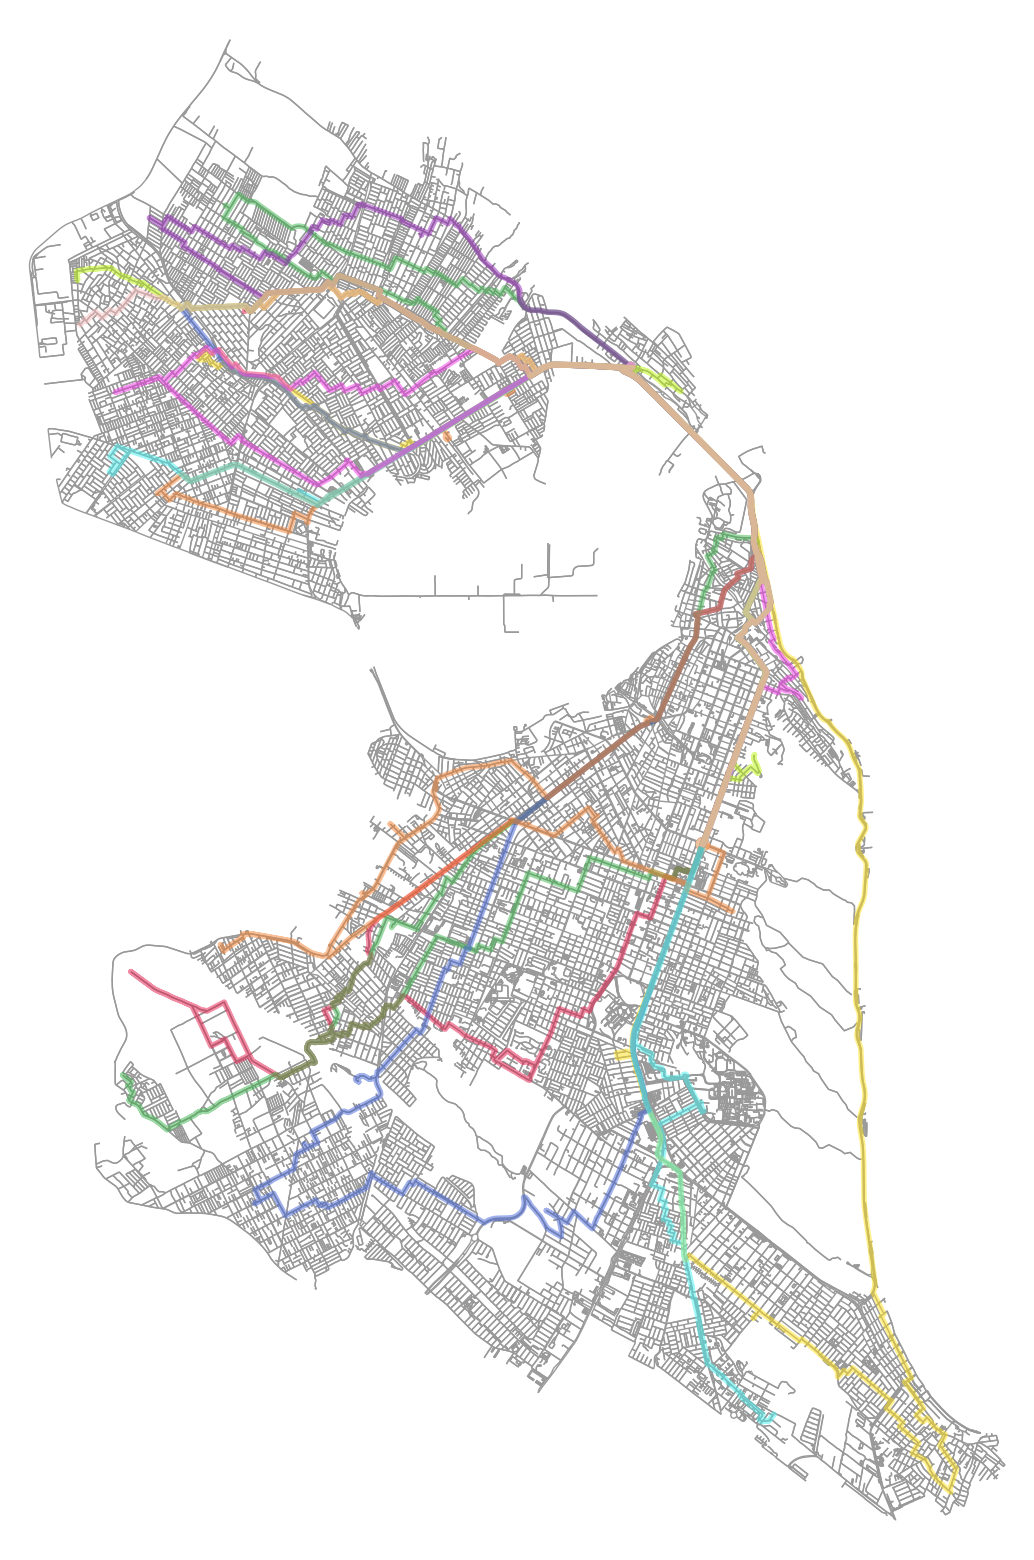

Mapa final gerado com sucesso!


In [14]:
# Listas para armazenar os dados para o mapa
routes_to_plot = []
final_route_colors = []

# Paleta de 10 cores distintas para os colaboradores
route_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe'
]

total_distance_all_vehicles = 0

# Itera sobre cada um dos 10 colaboradores
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    route_indices = []

    # Constrói a sequência de paradas para o colaborador atual
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        route_indices.append(node_index)
        index = solution.Value(routing.NextVar(index))
    route_indices.append(manager.IndexToNode(index))

    # Processa apenas se o colaborador tiver uma rota real (mais que ir e voltar do depósito)
    if len(route_indices) > 2:
        # Calcula a distância total da rota usando a matriz
        route_distance = sum(distance_matrix[route_indices[i]][route_indices[i+1]] for i in range(len(route_indices) - 1))
        total_distance_all_vehicles += route_distance

        # Imprime o resumo da rota do colaborador
        print(f'  > Rota Colaborador {vehicle_id}: {len(route_indices) - 2} casas. Distância: {(route_distance / 1000):.2f} km')

        # Constrói o caminho geográfico detalhado para plotagem usando a path_matrix
        full_path_for_vehicle = []
        for i in range(len(route_indices) - 1):
            path_segment = path_matrix[route_indices[i]][route_indices[i+1]]
            if path_segment:
                full_path_for_vehicle.extend(path_segment[:-1]) # Adiciona o segmento, exceto o último nó

        # Adiciona o último nó da última parte do caminho
        if full_path_for_vehicle:
            last_segment = path_matrix[route_indices[-2]][route_indices[-1]]
            if last_segment:
                full_path_for_vehicle.append(last_segment[-1])

        # Adiciona o caminho e a cor às listas de plotagem
        routes_to_plot.append(full_path_for_vehicle)
        final_route_colors.append(route_colors[vehicle_id])

# Imprime o resumo geral da operação
print(f'\nDistância total combinada para todos os colaboradores: {(total_distance_all_vehicles / 1000):.2f} km')

# Gera o mapa final com todas as rotas
print("\nGerando o mapa com as rotas otimizadas...")
fig, ax = ox.plot.plot_graph_routes(
    G,
    routes=routes_to_plot,
    route_colors=final_route_colors,
    route_linewidth=2.5,
    node_size=0,
    bgcolor="#FFFFFF",
    figsize=(20, 20)
)
print("Mapa final gerado com sucesso!")


# **Min Heap**

In [ ]:
class MinHeap:
    """
    MinHeap class: Implements a MinHeap data structure to efficiently manage vertices and their distances
    for algorithms like Dijkstra. This implementation keeps track of the position of each vertex using
    a vertex map for constant-time lookups and updates.
    """
    def __init__(self, array):
        """
        Initializes the MinHeap with an input array of (vertex, distance) pairs.

        Args:
            array (list): List of tuples where each tuple is (vertex, distance).
                          The distance is typically initialized to infinity except for the starting vertex.

        Attributes:
            vertexMap (dict): Maps each vertex to its position in the heap for quick access.
            heap (list): List representing the binary heap as an array.
        """
        # Create a vertex map: Maps vertices to their indices in the heap.
        self.vertexMap = {idx: idx for idx in range(len(array))}

        # Build the heap from the input array to satisfy the heap property.
        self.heap = self.buildHeap(array)

    def isEmpty(self):
        """
        Checks if the heap is empty.

        Returns:
            bool: True if the heap is empty, False otherwise.
        """
        return len(self.heap) == 0

    def buildHeap(self, array):
        """
        Builds the heap from an input array in O(n) time.

        Args:
            array (list): List of (vertex, distance) pairs.

        Returns:
            list: The input array transformed into a valid MinHeap.
        """
        # Start from the first parent node and sift down each node.
        firstParentIdx = (len(array) - 2) // 2
        for currentIdx in reversed(range(firstParentIdx + 1)):
            self.siftDown(currentIdx, len(array) - 1, array)
        return array

    def siftDown(self, currentIdx, endIdx, heap):
        """
        Restores the heap property by "sifting down" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift down.
            endIdx (int): Last index in the heap.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        childOneIdx = currentIdx * 2 + 1  # Index of the first child
        while childOneIdx <= endIdx:
            # Determine the index of the second child
            childTwoIdx = currentIdx * 2 + 2 if currentIdx * 2 + 2 <= endIdx else -1

            # Choose the smaller child to maintain the min-heap property
            if childTwoIdx != -1 and heap[childTwoIdx][1] < heap[childOneIdx][1]:
                idxToSwap = childTwoIdx
            else:
                idxToSwap = childOneIdx

            # Swap if the child is smaller than the current node
            if heap[idxToSwap][1] < heap[currentIdx][1]:
                self.swap(currentIdx, idxToSwap, heap)
                currentIdx = idxToSwap  # Move to the swapped position
                childOneIdx = currentIdx * 2 + 1  # Update the first child index
            else:
                return

    def siftUp(self, currentIdx, heap):
        """
        Restores the heap property by "sifting up" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift up.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        parentIdx = (currentIdx - 1) // 2  # Calculate parent index
        while currentIdx > 0 and heap[currentIdx][1] < heap[parentIdx][1]:
            self.swap(currentIdx, parentIdx, heap)  # Swap with parent
            currentIdx = parentIdx  # Move to the parent's position
            parentIdx = (currentIdx - 1) // 2

    def remove(self):
        """
        Removes and returns the smallest element (root) in the heap.

        Returns:
            tuple: The (vertex, distance) pair with the smallest distance.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        if self.isEmpty():
            return None

        # Swap the root with the last element and remove it
        self.swap(0, len(self.heap) - 1, self.heap)
        vertex, distance = self.heap.pop()
        self.vertexMap.pop(vertex)  # Remove the vertex from the map

        # Restore the heap property
        self.siftDown(0, len(self.heap) - 1, self.heap)
        return vertex, distance

    def swap(self, i, j, heap):
        """
        Swaps two nodes in the heap and updates their positions in the vertexMap.

        Args:
            i (int): Index of the first node.
            j (int): Index of the second node.
            heap (list): The heap array.
        """
        self.vertexMap[heap[i][0]] = j  # Update vertexMap for heap[i]
        self.vertexMap[heap[j][0]] = i  # Update vertexMap for heap[j]
        heap[i], heap[j] = heap[j], heap[i]  # Swap the nodes in the heap

    def update(self, vertex, value):
        """
        Updates the distance of a given vertex and restores the heap property.

        Args:
            vertex (int): The vertex whose distance is to be updated.
            value (int): The new distance value.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        # Update the heap with the new (vertex, value) pair
        self.heap[self.vertexMap[vertex]] = (vertex, value)
        # Restore the heap property by sifting up the updated node
        self.siftUp(self.vertexMap[vertex], self.heap)

# Dijkstra alterado

In [ ]:
def dijkstrasAlgorithmWithPaths(start, edges):
    """
    Implements Dijkstra's algorithm to compute the shortest paths from a starting vertex to all other vertices
    in a weighted graph. It also tracks the predecessors of each vertex for path reconstruction.

    Args:
        start (int): The index of the starting vertex.
        edges (list of list): Adjacency list representation of the graph, where each index represents a vertex,
                              and each entry is a list of [destination, weight] pairs.

    Returns:
        tuple: A tuple containing:
            - minDistances (list): A list of the shortest distances from the starting vertex to each vertex.
                                   Vertices that are unreachable will have a distance of `float("inf")`.
            - previousNodes (list): A list where each index points to the predecessor of the vertex
                                    in the shortest path. If no path exists, the predecessor is `None`.

    Algorithm Steps:
        1. Initialize distances with `infinity` and set the starting vertex distance to 0.
        2. Use a MinHeap to manage and efficiently retrieve the vertex with the smallest known distance.
        3. For each vertex, relax its edges to update distances to neighboring vertices.
        4. Track the predecessor of each vertex to allow path reconstruction later.
        5. Return the minimum distances and the list of predecessors.
    """
    numberOfVertices = len(edges)  # Total number of vertices in the graph

    # Step 1: Initialize minimum distances and predecessors
    minDistances = [float("inf")] * numberOfVertices  # All distances set to infinity initially
    minDistances[start] = 0  # Distance to the start node is 0

    previousNodes = [None] * numberOfVertices  # Array to store the predecessor of each vertex

    # Step 2: Initialize the MinHeap
    heap = MinHeap([(i, float("inf")) for i in range(numberOfVertices)])
    heap.update(start, 0)  # Update the distance of the starting vertex to 0

    # Step 3: Process vertices until the heap is empty
    while not heap.isEmpty():
        # Extract the vertex with the smallest known distance
        vertex, currentMinDistance = heap.remove()

        # Ignore outdated distances (e.g., if a shorter distance was already found)
        if minDistances[vertex] <currentMinDistance:
            continue

        # Step 4: Relaxation - Update distances to neighboring vertices
        for edge in edges[vertex]:
            destination, weight = edge  # Extract destination vertex and edge weight

            # Calculate the new potential distance to the destination vertex
            newPathDistance = currentMinDistance + weight

            # Update if the new path is shorter
            if newPathDistance <= minDistances[destination]:
                minDistances[destination] = newPathDistance
                previousNodes[destination] = vertex  # Track the predecessor for path reconstruction

                if destination in heap.vertexMap: # Modificação realizada
                  heap.update(destination, newPathDistance) # Update the heap with the new distance

    return minDistances, previousNodes


def reconstructPath(previousNodes, start, end):
    """
    Reconstructs the shortest path from the start node to the end node using the predecessor list.

    Args:
        previousNodes (list): A list where each index corresponds to a node, and the value at that index
                              is the predecessor node in the shortest path. `None` indicates no predecessor.
        start (int): The starting node index.
        end (int): The destination node index.

    Returns:
        list: A list of nodes representing the shortest path from the start node to the end node.
              If no path exists, returns an empty list.

    Algorithm:
        1. Start from the destination node (`end`) and trace back to the start node (`start`) using
           the `previousNodes` list.
        2. Append each node encountered to the `path` list.
        3. Reverse the `path` list to produce the correct order from start to end.
        4. If no valid path exists (e.g., disconnected graph), return an empty list.

    Example:
        previousNodes = [None, 0, 1, 2]  # Predecessor list
        start = 0
        end = 3
        reconstructPath(previousNodes, start, end) -> [0, 1, 2, 3]
    """
    path = []  # Initialize an empty list to store the path
    currentNode = end  # Start tracing from the destination node

    # Step 1: Trace back from the destination node to the start node
    while currentNode is not None and currentNode != start:
        path.append(currentNode)  # Add the current node to the path
        currentNode = previousNodes[currentNode]  # Move to the predecessor node

    # Step 2: Add the start node if a valid path was found
    if currentNode == start:
        path.append(start)  # Add the start node to the path
        path.reverse()  # Reverse the path to get the correct order from start to end
        return path

    # Step 3: If no path exists, return an empty list
    return []

# Gerando as matrizes para utilização do Or-Tools e aplicando o **Dijkstra + min-heap**

In [ ]:
tracker = cc.EmissionsTracker()
tracker.start()

# Preparando os dados

# Juntando a origem (depósito) com os 65 destinos (casas) em uma única lista de 66 pontos.
all_snapped_nodes = [orig_node] + dest_nodes_snapped

adjacency_list, node_to_index, index_to_node = get_adjacency_list(G)

distance_matrix = [] # Matriz do solver/Tabela de quilometragens
path_matrix = [] #Mapa detalhado


#Calculando os caminhos mais curtos

for start_osmid in all_snapped_nodes:

    # Converte o ID do OSMnx do ponto de partida para seu índice correspondente (ex: 0 para a origem).
    start_idx = node_to_index[start_osmid]


    # Calculando as distâncias e os caminhos para todos os outros 65 pontos
    all_distances, all_predecessors = dijkstrasAlgorithmWithPaths(start_idx, adjacency_list)

    # Prepara duas listas vazias para armazenar uma linha inteira das matrizes
    dist_row, path_row = [], []

    # Prenchendo a linha das matrizes
    for end_osmid in all_snapped_nodes:

        if start_osmid == end_osmid:
            dist_row.append(0)
            path_row.append([start_osmid])
            continue

        end_idx = node_to_index[end_osmid]

        distance = all_distances[end_idx]

        # Se a distância for infinita, significa que o ponto é inalcançável. (fora da cidade, por exemplo)
        if distance == float('inf'):
            dist_row.append(9999999) # Adiciona um valor muito alto para o VRP evitar essa rota.
            path_row.append(None)
        else:

            # Se houver um caminho, anota a distância e reconstrói o caminho usando a linha de predecessores
            dist_row.append(int(distance))
            path_idx = reconstructPath(all_predecessors, start_idx, end_idx)
            path_osmid = [index_to_node[i] for i in path_idx]
            path_row.append(path_osmid)

      #Adiciona a linha preenchida às matrizes
    distance_matrix.append(dist_row)
    path_matrix.append(path_row)

emissions_Djk_hp = tracker.stop()

print("Matrizes de distância e caminho criadas com sucesso!")

[codecarbon WARNING @ 05:23:28] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 05:23:28] [setup] RAM Tracking...
[codecarbon INFO @ 05:23:28] [setup] CPU Tracking...
[codecarbon WARNING @ 05:23:29] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 05:23:29] CPU Model on constant consumption mode: AMD EPYC 7B12
[codecarbon WARNING @ 05:23:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 05:23:29] [setup] GPU Tracking...
[codecarbon INFO @ 05:23:29] No GPU found.
[codecarbon INFO @ 05:23:29] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 05:23:29] >>> Tracker's m

Matrizes de distância e caminho criadas com sucesso!


# Configurando, dando regras e executando o solver do VRP

In [ ]:
def create_data_model():
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 10
    data['depot'] = 0
    return data

# Identificando as 10 casas mais longes da origem

# A primeira linha da matriz de distância contém as distâncias da origem para todos os outros pontos.
distancias_da_origem = distance_matrix[0][1:] # Pega as distâncias para as 65 casas


# Argsort retorna os índices que ordenariam a lista. Pegamos os últimos 10.
indices_das_10_mais_distantes = np.argsort(distancias_da_origem)[-10:]


# Precisamos somar 1 para corresponder aos índices na matriz (onde 0 é a origem). Pois estamos contando de 0 à 64
casas_para_atribuir = [index + 1 for index in indices_das_10_mais_distantes]
print(f"Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.")


# Configurando o Solver
data = {'distance_matrix': distance_matrix, 'num_vehicles': 10, 'depot': 0}
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Regra 1: Obriga a visitar todos os pontos
for node in range(1, len(data['distance_matrix'])):
    routing.AddDisjunction([manager.NodeToIndex(node)], 1000000)

# Regra 2: Incentiva o balanceamento dos colaboradores
routing.AddDimension(transit_callback_index, 0, 3000000, True, 'Distance')
distance_dimension = routing.GetDimensionOrDie('Distance')
distance_dimension.SetGlobalSpanCostCoefficient(171)


# Regra 3 Atribuindo pelo menos uma casa para cada colaborador

for i, casa_idx in enumerate(casas_para_atribuir):
    colaborador_id = i
    node_idx_manager = manager.NodeToIndex(casa_idx)

    # Adiciona uma restrição rígida: o veículo para o nó 'casa_idx' deve ser 'colaborador_id'
    routing.VehicleVar(node_idx_manager).SetValues([colaborador_id])


search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Adiciona um tempo limite para a busca, caso o problema seja muito complexo
search_parameters.time_limit.FromSeconds(30)

solution = routing.SolveWithParameters(search_parameters)


Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.


# Analisando a solução do VRP, imprimindo um resumo de cada rota e desenhando o mapa final

  > Rota Colaborador 0: 7 casas. Distância: 54.21 km
  > Rota Colaborador 1: 12 casas. Distância: 54.68 km
  > Rota Colaborador 2: 6 casas. Distância: 54.60 km
  > Rota Colaborador 3: 8 casas. Distância: 54.72 km
  > Rota Colaborador 4: 13 casas. Distância: 51.98 km
  > Rota Colaborador 5: 3 casas. Distância: 34.27 km
  > Rota Colaborador 6: 5 casas. Distância: 54.61 km
  > Rota Colaborador 7: 7 casas. Distância: 35.64 km
  > Rota Colaborador 8: 3 casas. Distância: 38.30 km
  > Rota Colaborador 9: 1 casas. Distância: 35.54 km

Distância total combinada para todos os colaboradores: 468.54 km


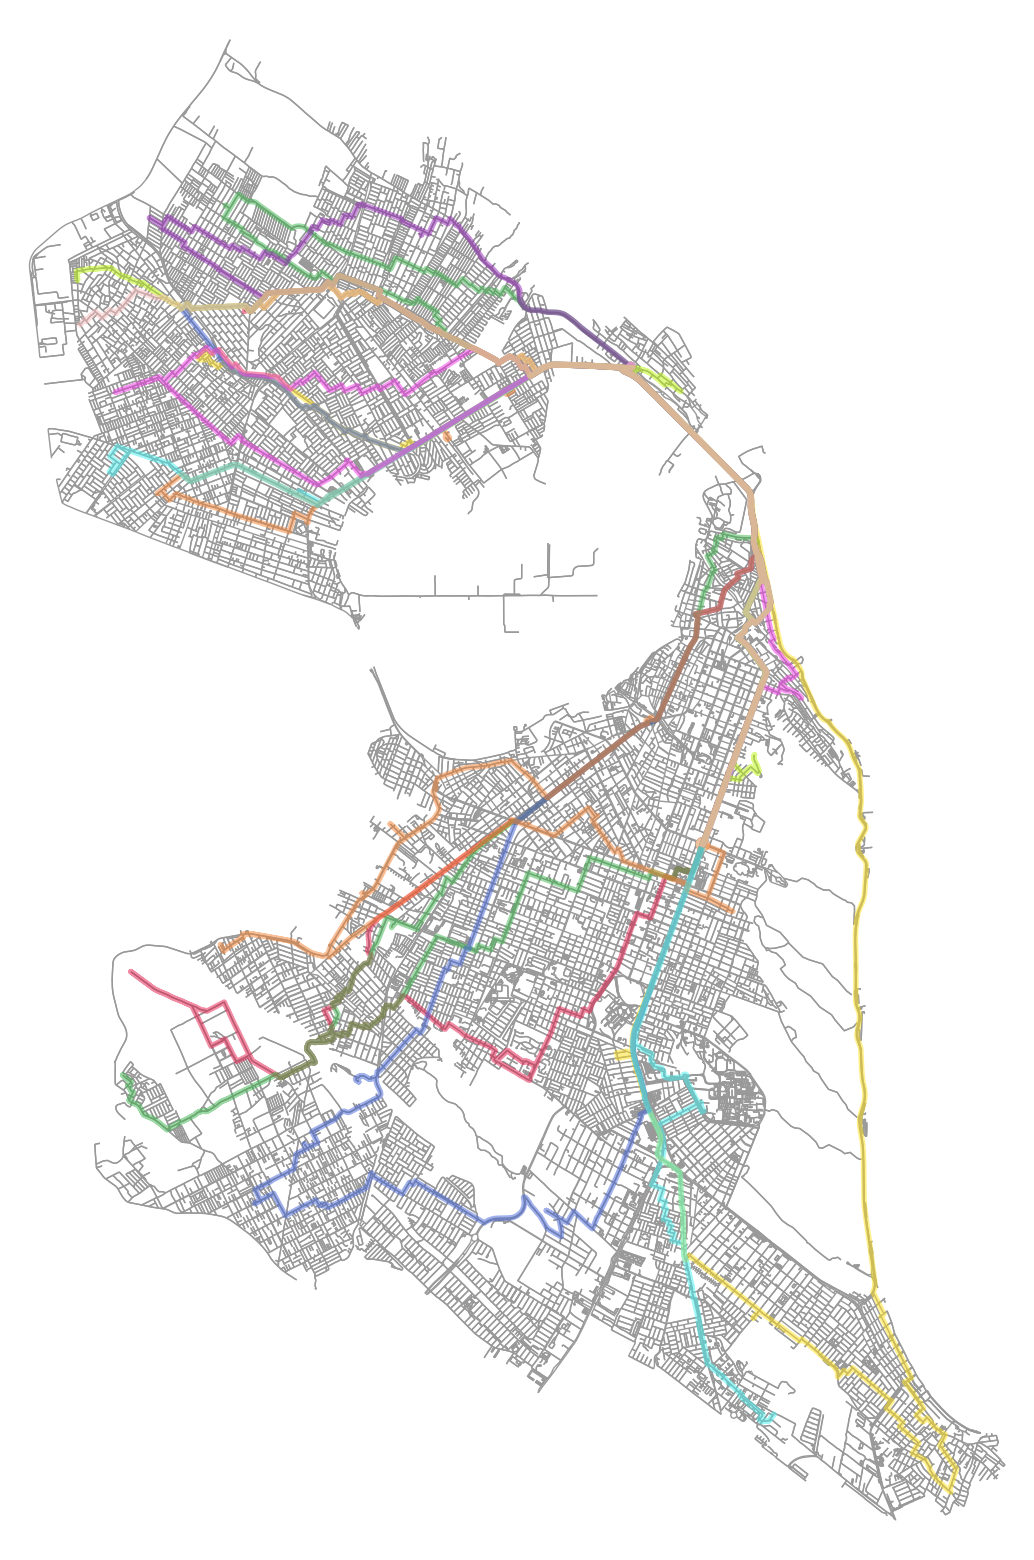

Mapa com as rotas otimizadas gerado com sucesso!


In [ ]:
# Listas para armazenar os dados para o mapa
routes_to_plot = []
final_route_colors = []

# 10 cores distintas para os colaboradores
route_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe'
]

total_distance_all_vehicles = 0

# Iterando sobre cada um dos 10 colaboradores
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    route_indices = []

    #Construindo a sequência de paradas para o colaborador atual
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        route_indices.append(node_index)
        index = solution.Value(routing.NextVar(index))
    route_indices.append(manager.IndexToNode(index))

    # Processando apenas se o colaborador tiver uma rota real (mais que ir e voltar do depósito)
    if len(route_indices) > 2:
        #Calculando a distância total da rota usando a matriz
        route_distance = sum(distance_matrix[route_indices[i]][route_indices[i+1]] for i in range(len(route_indices) - 1))
        total_distance_all_vehicles += route_distance

        #Imprimindo o resumo da rota do colaborador
        print(f'  > Rota Colaborador {vehicle_id}: {len(route_indices) - 2} casas. Distância: {(route_distance / 1000):.2f} km')

        #Construindo o caminho geográfico detalhado para plotagem usando a path_matrix
        full_path_for_vehicle = []
        for i in range(len(route_indices) - 1):
            path_segment = path_matrix[route_indices[i]][route_indices[i+1]]
            if path_segment:
                full_path_for_vehicle.extend(path_segment[:-1]) # Adiciona o segmento, exceto o último nó

        #Adicionando o último nó da última parte do caminho
        if full_path_for_vehicle:
            last_segment = path_matrix[route_indices[-2]][route_indices[-1]]
            if last_segment:
                full_path_for_vehicle.append(last_segment[-1])

        #Adicionando o caminho e a cor às listas de plotagem
        routes_to_plot.append(full_path_for_vehicle)
        final_route_colors.append(route_colors[vehicle_id])

#Imprimindo o resumo geral da operação
print(f'\nDistância total combinada para todos os colaboradores: {(total_distance_all_vehicles / 1000):.2f} km')

#Gerando o mapa final com todas as rotas
fig, ax = ox.plot.plot_graph_routes(
    G,
    routes=routes_to_plot,
    route_colors=final_route_colors,
    route_linewidth=2.5,
    node_size=0,
    bgcolor="#FFFFFF",
    figsize=(20, 20)
)
print("Mapa com as rotas otimizadas gerado com sucesso!")

# **Algorítmo A***

# Gerando as matrizes para utilização do Or-Tools e aplicando o A*

In [19]:
tracker = cc.EmissionsTracker()
tracker.start()

def dist_heuristica(u, v, G):
    #Calculando a distância em linha reta (geodésica) entre dois nós.

    u_coords = (G.nodes[u]['y'], G.nodes[u]['x'])
    v_coords = (G.nodes[v]['y'], G.nodes[v]['x'])
    return geopy.distance.great_circle(u_coords, v_coords).meters

# Todos os pontos de parada
all_snapped_nodes = [orig_node] + dest_nodes_snapped


distance_matrix_astar = [] # Solver para A*
path_matrix_astar = [] # Mapa detalhado para A*

# Percorrendo cada par de pontos para preencher a matriz
for start_osmid in all_snapped_nodes:
    dist_row, path_row = [], []
    for end_osmid in all_snapped_nodes:
        if start_osmid == end_osmid:
            dist_row.append(0)
            path_row.append([start_osmid])
            continue


        try:
            caminho = nx.astar_path(
                G,
                source=start_osmid,
                target=end_osmid,
                heuristic=lambda u, v: dist_heuristica(u, v, G),
                weight='length'
            )
            # Calculando o comprimento do caminho encontrado
            distancia = nx.path_weight(G, caminho, weight='length')

            dist_row.append(int(distancia))
            path_row.append(caminho)

        except nx.NetworkXNoPath:
            # Se não houver caminho
            dist_row.append(9999999)
            path_row.append(None)

    distance_matrix_astar.append(dist_row)
    path_matrix_astar.append(path_row)

emissions_astar = tracker.stop()

print(f"Matrizes com A* criadas! Dimensões: {len(distance_matrix_astar)}x{len(distance_matrix_astar[0])}")

[codecarbon WARNING @ 18:58:37] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:58:37] [setup] RAM Tracking...
[codecarbon INFO @ 18:58:37] [setup] CPU Tracking...
[codecarbon WARNING @ 18:58:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:58:38] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:58:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:58:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:58:38] [setup] GPU Tracking...
[codecarbon INFO @ 18:58:38] No GPU found.
[codecarbon INFO @ 18:58:38] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Matrizes com A* criadas! Dimensões: 66x66


# Configurando, dando regras e executando o solver do VRP

In [17]:
def create_data_model_astar():
    data = {}
    data['distance_matrix'] = distance_matrix_astar
    data['num_vehicles'] = 10
    data['depot'] = 0
    return data

# Identificando as 10 casas mais longes da origem

# A primeira linha da matriz de distância contém as distâncias da origem para todos os outros pontos.
distancias_da_origem = distance_matrix_astar[0][1:] # Pega as distâncias para as 65 casas


# Argsort retorna os índices que ordenariam a lista. Pegamos os últimos 10.
indices_das_10_mais_distantes = np.argsort(distancias_da_origem)[-10:]


# Precisamos somar 1 para corresponder aos índices na matriz (onde 0 é a origem). Pois estamos contando de 0 à 64
casas_para_atribuir = [index + 1 for index in indices_das_10_mais_distantes]
print(f"Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.")


# Configurando o Solver
data = {'distance_matrix': distance_matrix_astar, 'num_vehicles': 10, 'depot': 0}
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Regra 1: Obriga a visitar todos os pontos
for node in range(1, len(data['distance_matrix'])):
    routing.AddDisjunction([manager.NodeToIndex(node)], 1000000)

# Regra 2: Incentiva o balanceamento dos colaboradores
routing.AddDimension(transit_callback_index, 0, 3000000, True, 'Distance')
distance_dimension = routing.GetDimensionOrDie('Distance')
distance_dimension.SetGlobalSpanCostCoefficient(171)


# Regra 3 Atribuindo pelo menos uma casa para cada colaborador

for i, casa_idx in enumerate(casas_para_atribuir):
    colaborador_id = i
    node_idx_manager = manager.NodeToIndex(casa_idx)

    # Adiciona uma restrição rígida: o veículo para o nó 'casa_idx' deve ser 'colaborador_id'
    routing.VehicleVar(node_idx_manager).SetValues([colaborador_id])


search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Adiciona um tempo limite para a busca, caso o problema seja muito complexo
search_parameters.time_limit.FromSeconds(30)

solution = routing.SolveWithParameters(search_parameters)


Atribuindo as 10 casas mais distantes para forçar o uso dos 10 colaboradores.


# Analisando a solução do VRP, imprimindo um resumo de cada rota e desenhando o mapa final

  > Rota Colaborador 0: 7 casas. Distância: 54.21 km
  > Rota Colaborador 1: 12 casas. Distância: 54.68 km
  > Rota Colaborador 2: 6 casas. Distância: 54.60 km
  > Rota Colaborador 3: 8 casas. Distância: 54.72 km
  > Rota Colaborador 4: 13 casas. Distância: 51.98 km
  > Rota Colaborador 5: 3 casas. Distância: 34.27 km
  > Rota Colaborador 6: 5 casas. Distância: 54.61 km
  > Rota Colaborador 7: 7 casas. Distância: 35.64 km
  > Rota Colaborador 8: 3 casas. Distância: 38.30 km
  > Rota Colaborador 9: 1 casas. Distância: 35.54 km

Distância total combinada para todos os colaboradores: 468.54 km


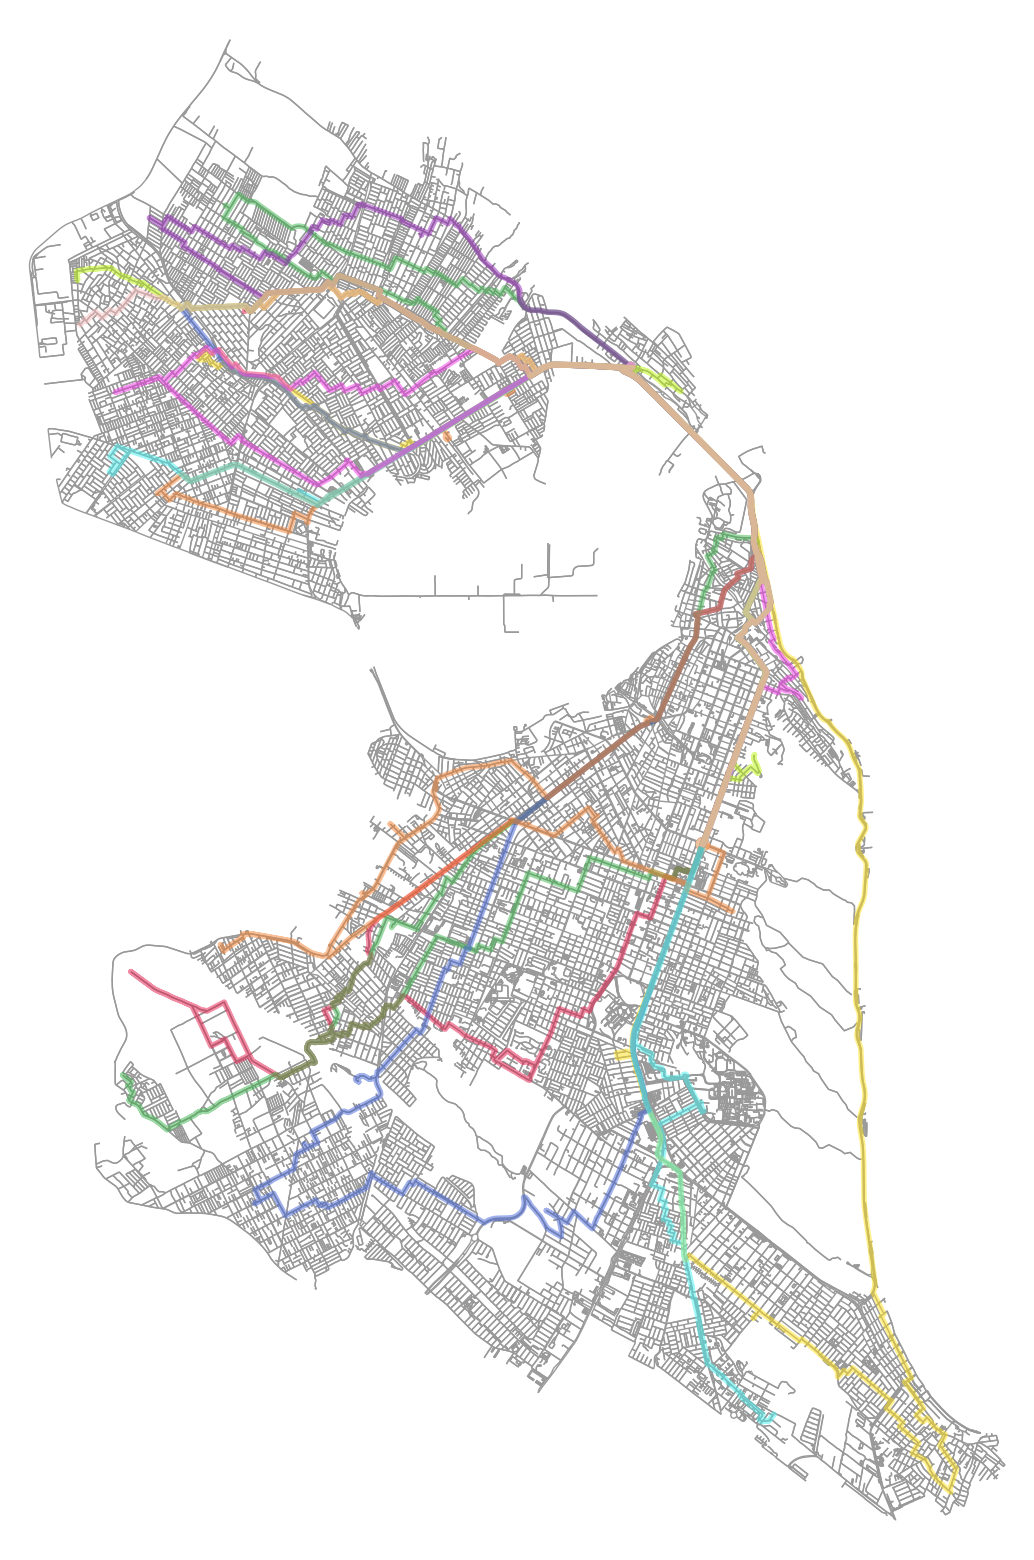

Mapa com as rotas otimizadas gerado com sucesso!


In [18]:
# Listas para armazenar os dados para o mapa
routes_to_plot = []
final_route_colors = []

# 10 cores distintas para os colaboradores
route_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe'
]

total_distance_all_vehicles = 0

# Iterando sobre cada um dos 10 colaboradores
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    route_indices = []

    #Construindo a sequência de paradas para o colaborador atual
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        route_indices.append(node_index)
        index = solution.Value(routing.NextVar(index))
    route_indices.append(manager.IndexToNode(index))

    # Processando apenas se o colaborador tiver uma rota real (mais que ir e voltar do depósito)
    if len(route_indices) > 2:
        #Calculando a distância total da rota usando a matriz
        route_distance = sum(distance_matrix[route_indices[i]][route_indices[i+1]] for i in range(len(route_indices) - 1))
        total_distance_all_vehicles += route_distance

        #Imprimindo o resumo da rota do colaborador
        print(f'  > Rota Colaborador {vehicle_id}: {len(route_indices) - 2} casas. Distância: {(route_distance / 1000):.2f} km')

        #Construindo o caminho geográfico detalhado para plotagem usando a path_matrix
        full_path_for_vehicle = []
        for i in range(len(route_indices) - 1):
            path_segment = path_matrix_astar[route_indices[i]][route_indices[i+1]]
            if path_segment:
                full_path_for_vehicle.extend(path_segment[:-1]) # Adiciona o segmento, exceto o último nó

        #Adicionando o último nó da última parte do caminho
        if full_path_for_vehicle:
            last_segment = path_matrix_astar[route_indices[-2]][route_indices[-1]]
            if last_segment:
                full_path_for_vehicle.append(last_segment[-1])

        #Adicionando o caminho e a cor às listas de plotagem
        routes_to_plot.append(full_path_for_vehicle)
        final_route_colors.append(route_colors[vehicle_id])

#Imprimindo o resumo geral da operação
print(f'\nDistância total combinada para todos os colaboradores: {(total_distance_all_vehicles / 1000):.2f} km')

#Gerando o mapa final com todas as rotas
fig, ax = ox.plot.plot_graph_routes(
    G,
    routes=routes_to_plot,
    route_colors=final_route_colors,
    route_linewidth=2.5,
    node_size=0,
    bgcolor="#FFFFFF",
    figsize=(20, 20)
)
print("Mapa com as rotas otimizadas gerado com sucesso!")